# Experiment 3: Document at various level for datasets(COVID-science : non-science : Psychology)

## 1. Article level

In [1]:
#import
import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn as s
import dataframe_image as dfi
import networkx as nx
import mantel

C:\ProgramData\Anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


### covid-science.txt

In [2]:
def load_data(path,file_name,seperator):
    """
    Input  : path and file_name
    Purpose: loading text file
    Output : list of paragraphs/documents and
             title(initial 100 words considred as title of document)
    """
    documents_list = []
    titles=[]
    document = ''
    i=0
    with open( os.path.join(path, file_name) ,"r", encoding="utf8") as fin:
        data = fin.read()
        words = data.split()
        fin.seek(0)
        print('Number of words in text file :', len(words))
        for line in fin.readlines():
            text = line.strip()
            i=i+1
            if text !='':
                document = document+text
                if text == seperator:
                    documents_list.append(document)
                    document = ''
        documents_list.append(document)
    print("Total Number of Documents:",len(documents_list))
    titles.append( text[0:min(len(text),100)] )
    return documents_list,titles,len(words)

In [3]:
document_list,titles,word_count_science=load_data("","covid-science.txt",'NEW_PAPER')

Number of words in text file : 120257
Total Number of Documents: 20


In [4]:
def preprocess_data(doc_set):
    """
    Input  : docuemnt list
    Purpose: preprocess text (tokenize, removing stopwords, and stemming)
    Output : preprocessed text
    """
    # initialize regex tokenizer
    tokenizer = RegexpTokenizer(r'\w+')
    # create English stop words list
    en_stop = set(stopwords.words('english'))
    # Create p_stemmer of class PorterStemmer
    p_stemmer = PorterStemmer()
    # list for tokenized documents in loop
    texts = []
    # loop through document list
    for i in doc_set:
        # clean and tokenize document string
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)
        tokens = [i for i in tokens if len(i)>4]
        print(tokens)
        # remove stop words from tokens
        stopped_tokens = [i for i in tokens if not i in en_stop]
        # stem tokens
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        # add tokens to list
        texts.append(stemmed_tokens)
    return texts

In [5]:
clean_text=preprocess_data(document_list)

['covidgr', 'dataset', 'covid', 'sdnetmethodology', 'predicting', 'covid', '19based', 'chest', 'imagess', 'tabik', 'gómez', 'martín', 'rodríguez', 'sevillano', 'garcía', 'charte', 'guirado', 'suárez', 'luengo', 'valero', 'gonzález', 'garcía', 'villanova', 'olmedo', 'sánchez', 'herreraabstract', 'currently', 'coronavirus', 'disease', 'covid', 'infectious', 'diseases', 'century', 'diagnosed', 'using', 'testing', 'scans', 'orchest', 'images', 'computed', 'tomography', 'scanners', 'testing', 'available', 'mostmedical', 'centers', 'hence', 'cases', 'imagesbecome', 'effective', 'assisting', 'clinicians', 'making', 'decisions', 'learning', 'neural', 'networkshave', 'great', 'potential', 'building', 'covid', 'triage', 'systemsand', 'detecting', 'covid', 'patients', 'especially', 'patients', 'withlow', 'severity', 'unfortunately', 'current', 'databases', 'allowbuilding', 'systems', 'highly', 'heterogeneousand', 'biased', 'towards', 'severe', 'cases', 'article', 'threefold', 'demystify', 'sensit

In [6]:
def prepare_corpus(doc_clean):
    """
    Input  : clean document
    Purpose: create term dictionary of our courpus and Converting list of documents (corpus) into Document Term Matrix
    Output : term dictionary and Document Term Matrix
    """
    # Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
    dictionary = corpora.Dictionary(doc_clean)
    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    # generate LDA model
    return dictionary,doc_term_matrix

In [7]:
def create_gensim_lsa_model(doc_clean,number_of_topics,words):
    """
    Input  : clean document, number of topics and number of words associated with each topic
    Purpose: create LSA model using gensim
    Output : return LSA model
    """
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    # generate LSA model
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
    #print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel

In [8]:
# LSA Model
number_of_topics=20
words=word_count_science
model_science=create_gensim_lsa_model(clean_text,number_of_topics,words)
words_covid_science =dict(model_science.show_topic(0, topn=words))##dict and encoding matrix values

In [9]:
#These variables are for further experimentation in vertical comparission mantel test
model_science_articles = create_gensim_lsa_model(clean_text,number_of_topics,words)

In [10]:
dict(model_science.show_topic(0, topn=5))

{'covid': 0.5195000201940337,
 'imag': 0.3819419924959858,
 'model': 0.24414357176752965,
 'dataset': 0.17846130209695152,
 'class': 0.15297059818817454}

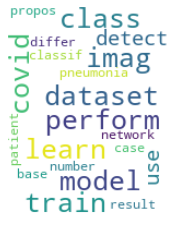

In [11]:
from wordcloud import WordCloud
text = dict(model_science.show_topic(0, topn=20))
l=list(text.keys())
wordcloud = WordCloud(width=150, height=200,max_font_size=25, max_words=20, background_color="white").generate(" ".join(l))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('graph12.png')

In [12]:
# LSA Model

a=pd.DataFrame()

for i in range(number_of_topics):
    words_covid_science =dict(model_science.show_topic(i, topn=words))
    b=pd.DataFrame(words_covid_science,index=[i])
    a=a.append(b)

a=a.transpose()

top_words = dict(model_science.show_topic(0,topn=5))

df = pd.DataFrame(columns=list(top_words.keys()), 
                  index = list(top_words.keys()))

l = list(top_words.keys())
print('cosine-similarity')
for i in l:
    for j in l:
            matrix=np.array([a.loc[i],a.loc[j]])
            n = s.metrics.pairwise.cosine_similarity(matrix, matrix, dense_output=True)
            df.loc[[i],[j]] = n[0,1]
print(df)

dfi.export(df, 'df_styled15.png')

cosine-similarity
             covid       imag       model     dataset      class
covid            1   0.114718   0.0699065  -0.0721506   0.275795
imag      0.114718          1   -0.101632    0.179926  0.0364016
model    0.0699065  -0.101632           1  0.00335218   0.049745
dataset -0.0721506   0.179926  0.00335218           1  0.0568222
class     0.275795  0.0364016    0.049745   0.0568222          1


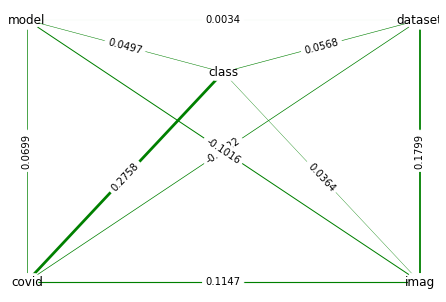

In [13]:
df = df.apply(pd.to_numeric, errors='coerce')

df=df.round(4)

l = list(top_words.keys())

df_adj = pd.DataFrame(df.to_numpy(), index=l, columns=l)
G = nx.from_pandas_adjacency(df)
pos = {l[0]: (0, 0),l[1]: (1, 0), l[2]: (0, 1), l[3]: (1, 1), l[4]: (0.5, 0.8)}
a=list(G.edges(data=True))

b=[]
for i in a:
    b.append(i[:][2]['weight'])
w = [x *10  for x in b]

colors = range(4)
nx.draw(G,pos, alpha=1, width=w, with_labels = True,node_size=200, edge_color='g',node_color='b')
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_nodes(G, pos, nodelist=l, node_color="w")
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.rcParams["figure.figsize"] = (8,5)
plt.savefig('fig15.png')

### covid-non-science.txt

In [14]:
document_list,titles,word_count_nscience=load_data("","covid-non-science.txt",'NEW NEWSPAPER')

Number of words in text file : 8713
Total Number of Documents: 20


In [15]:
clean_text=preprocess_data(document_list)

['covid', 'recovery', 'covid', 'realityby', 'reuterspublished', 'updated', '2020by', 'joneslondon', 'reuters', 'world', 'shares', 'inched', 'towards', 'month', 'friday', 'industrial', 'bellwether', 'metal', 'copper', 'longest', 'weekly', 'winning', 'streak', 'nearly', 'three', 'years', 'recovering', 'global', 'nagging', 'coronavirus', 'nerves', 'market', 'rally', 'fuelled', 'record', 'numbers', 'largely', 'blown', 'itself', 'spike', 'covid', 'cases', 'though', 'fastest', 'expansion', 'china', 'services', 'sector', 'decade', 'stimulus', 'ensured', 'optimism', 'remained', 'chinese', 'shares', 'charged', 'their', 'highest', 'level', 'years', 'helping', 'asian', 'indexes', 'month', 'peaks', 'sight', 'european', 'markets', 'stalling', 'early', 'traders', 'surprise', 'currency', 'commodity', 'markets', 'subdued', 'after', 'otherwise', 'strong', 'confidence', 'sensitive', 'stalwarts', 'copper', 'sterling', 'australian', 'dollar', 'which', 'struggled', 'friday', 'think', 'infection', 'rates', 

In [16]:
# LSA Model
number_of_topics=20
words=word_count_nscience
model_nscience=create_gensim_lsa_model(clean_text,number_of_topics,words)
words_from_non_science =dict(model_nscience.show_topic(0, topn=words))#dict and encoding matrix values


In [17]:
dict(model_nscience.show_topic(0,topn=5))

{'test': 0.5525012615032738,
 'peopl': 0.3271103290880657,
 'covid': 0.32350304714824835,
 'symptom': 0.20147297742697376,
 'travel': 0.15909033106510664}

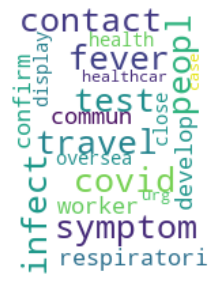

In [18]:
from wordcloud import WordCloud
text = dict(model_nscience.show_topic(0, topn=20))
l=list(text.keys())
wordcloud = WordCloud(width=150, height=200,max_font_size=25, max_words=20, background_color="white").generate(" ".join(l))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('graph7.png')

In [19]:
# LSA Model

a=pd.DataFrame()

for i in range(number_of_topics):
    words_covid_non_science =dict(model_nscience.show_topic(i, topn=words))
    b=pd.DataFrame(words_covid_non_science,index=[i])
    a=a.append(b)

a=a.transpose()

top_words = dict(model_nscience.show_topic(0,topn=5))

df = pd.DataFrame(columns=list(top_words.keys()), 
                  index = list(top_words.keys()))

l = list(top_words.keys())
print('cosine-similarity')
for i in l:
    for j in l:
            matrix=np.array([a.loc[i],a.loc[j]])
            n = s.metrics.pairwise.cosine_similarity(matrix, matrix, dense_output=True)
            df.loc[[i],[j]] = n[0,1]
print(df)

dfi.export(df, 'df_styled7.png')

cosine-similarity
              test     peopl      covid    symptom     travel
test             1  0.336661  0.0349857   0.898669   0.716668
peopl     0.336661         1   0.308412   0.423709   0.271003
covid    0.0349857  0.308412          1 -0.0604921 -0.0986359
symptom   0.898669  0.423709 -0.0604921          1   0.755495
travel    0.716668  0.271003 -0.0986359   0.755495          1


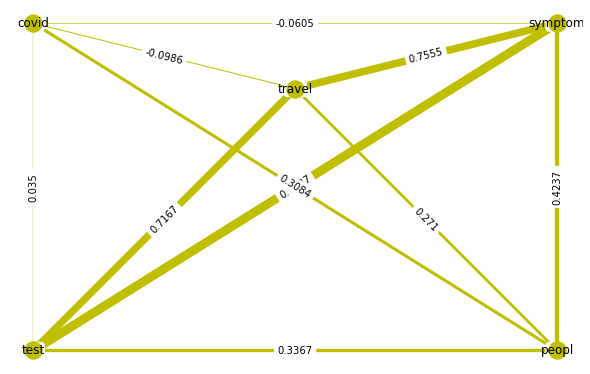

In [20]:
df = df.apply(pd.to_numeric, errors='coerce')

df=df.round(4)

l = list(top_words.keys())

df_adj = pd.DataFrame(df.to_numpy(), index=l, columns=l)
G = nx.from_pandas_adjacency(df)
pos = {l[0]: (0, 0),l[1]: (1, 0), l[2]: (0, 1), l[3]: (1, 1), l[4]: (0.5, 0.8)}
a=list(G.edges(data=True))

b=[]
for i in a:
    b.append(i[:][2]['weight'])
w = [x *10  for x in b]

colors = range(4)
nx.draw(G,pos, alpha=1, width=w, with_labels = True,node_size=200, edge_color='y',node_color='b')
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_nodes(G, pos, nodelist=l, node_color="y")
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.rcParams["figure.figsize"] = (8,5)
plt.savefig('fig7.png')

### covid-psychology.txt

In [21]:
document_list,titles,word_count_psy=load_data("","covid-psychology.txt",'NEW PAPER')

Number of words in text file : 86550
Total Number of Documents: 20


In [22]:
clean_text=preprocess_data(document_list)

['international', 'sociology2021', 'author', '2020article', 'reuse', 'guidelines', 'sagepub', 'journals', 'permissionsdoi', '0268580920948807journals', 'sagepub', 'isspsychology', 'politics', 'ofcovid', 'misinfodemics', 'peoplebelieve', 'misinfodemics', 'sonia', 'mukhtaruniversity', 'management', 'technology', 'lahore', 'pakistanabstractmisinfodemics', 'related', 'covid', 'negatively', 'impacted', 'people', 'lives', 'adversehealth', 'psycho', 'sociopolitical', 'outcomes', 'scientific', 'community', 'seeks', 'communicateevidence', 'based', 'information', 'regarding', 'misplaced', 'preventive', 'strategies', 'misinformed', 'helpseeking', 'behaviors', 'global', 'multifaceted', 'systems', 'secondary', 'emerged', 'effects', 'ofmisinfodemics', 'public', 'published', 'articles', 'pubmed', 'embase', 'google', 'scholar', 'elsevierabout', 'covid', 'related', 'misinfodemics', 'considered', 'reviewed', 'article', 'thisreview', 'examines', 'mechanisms', 'operational', 'structure', 'prevalence', 'pr

In [23]:
# LSA Model
number_of_topics=20
words=word_count_psy
model_psy=create_gensim_lsa_model(clean_text,number_of_topics,words)
words_from_psychology =dict(model_psy.show_topic(0, topn=words))#dict and encoding matrix values


In [24]:
#These variables are for further experimentation in vertical comparission mantel test
model_psy_articles=create_gensim_lsa_model(clean_text,number_of_topics,words)

In [25]:
dict(model_psy.show_topic(0,topn=5))

{'covid': 0.3733564956224112,
 'psycholog': 0.2678599109041967,
 'social': 0.251779781716548,
 'epidem': 0.19223792506780354,
 'health': 0.18194229083665667}

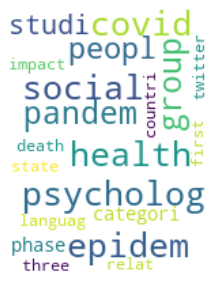

In [26]:
from wordcloud import WordCloud
text = dict(model_psy.show_topic(0, topn=20))
l=list(text.keys())
wordcloud = WordCloud(width=150, height=200,max_font_size=25, max_words=20, background_color="white").generate(" ".join(l))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('graph27.png')

In [27]:
# LSA Model
a=pd.DataFrame()

for i in range(number_of_topics):
    words_psychology =dict(model_psy.show_topic(i, topn=words))
    b=pd.DataFrame(words_psychology,index=[i])
    a=a.append(b)

a=a.transpose()

top_words = dict(model_psy.show_topic(0,topn=5))

df = pd.DataFrame(columns=list(top_words.keys()), 
                  index = list(top_words.keys()))

l = list(top_words.keys())
print('cosine-similarity')
for i in l:
    for j in l:
            matrix=np.array([a.loc[i],a.loc[j]])
            n = s.metrics.pairwise.cosine_similarity(matrix, matrix, dense_output=True)
            df.loc[[i],[j]] = n[0,1]
print(df)

dfi.export(df, 'df_styled8.png')

cosine-similarity
               covid psycholog     social     epidem     health
covid              1  0.150447  0.0375207 -0.0516623  0.0207802
psycholog   0.150447         1   0.168003   0.125162   0.380477
social     0.0375207  0.168003          1    0.44382  0.0839178
epidem    -0.0516623  0.125162    0.44382          1  0.0126691
health     0.0207802  0.380477  0.0839178  0.0126691          1


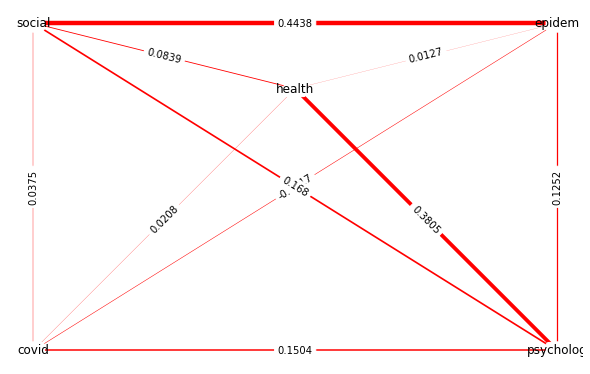

In [28]:
df = df.apply(pd.to_numeric, errors='coerce')

df=df.round(4)

l = list(top_words.keys())

df_adj = pd.DataFrame(df.to_numpy(), index=l, columns=l)
G = nx.from_pandas_adjacency(df)
pos = {l[0]: (0, 0),l[1]: (1, 0), l[2]: (0, 1), l[3]: (1, 1), l[4]: (0.5, 0.8)}
a=list(G.edges(data=True))

b=[]
for i in a:
    b.append(i[:][2]['weight'])
w = [x *10  for x in b]

colors = range(4)
nx.draw(G,pos, alpha=1, width=w, with_labels = True,node_size=200, edge_color='r',node_color='b')
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_nodes(G, pos, nodelist=l, node_color="w")
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.rcParams["figure.figsize"] = (8,5)
plt.savefig('fig8.png')

In [29]:
def mantel_test(n):
    words_science = dict(model_science.show_topic(0, topn=word_count_science))
    words_psy = dict(model_psy.show_topic(0, topn=word_count_psy))

    top_words_science = dict(model_science.show_topic(0, topn=n)) 
    top_words_psy = dict(model_psy.show_topic(0,topn=n)) 


    c={} #law words in non law
    for key in top_words_science:
        try:
            c[key] = words_psy[key]
        except KeyError:
            c[key] = 0

    top_words_psy.update(c)

    b={} #non law words in law
    for key in top_words_psy:
        try:
            b[key] = words_science[key]
        except KeyError:
            b[key] = 0

    b.update(top_words_science)
    top_words_science=b

    #pairwise distance for law
    a=pd.DataFrame()

    for i in range(number_of_topics):
        words_from_science =dict(model_science.show_topic(i, topn=word_count_science))
        b=pd.DataFrame(words_from_science,index=[i])
        a=a.append(b)

    a=a.transpose()

    df = pd.DataFrame(columns=list(top_words_science.keys()), 
                      index = list(top_words_science.keys()))

    l = list(top_words_science.keys())

    print('Pairwise-distance')
    for i in l:
        for j in l:
            try:
                matrix=np.array([a.loc[i],a.loc[j]])
            except KeyError:
                matrix=np.zeros((2,3))
            n = s.metrics.pairwise.nan_euclidean_distances(matrix, matrix)
            df.loc[[i],[j]] = n[0,1]
    print(df)
    df1 = df.to_numpy()
    #pairwise distace for non-law
    a=pd.DataFrame()

    for i in range(number_of_topics):
        words_from_psy =dict(model_psy.show_topic(i, topn=word_count_psy))
        b=pd.DataFrame(words_from_psy,index=[i])
        a=a.append(b)

    a=a.transpose()

    df = pd.DataFrame(columns=list(top_words_psy.keys()), 
                      index = list(top_words_psy.keys()))

    l = list(top_words_psy.keys())
    print('Pairwise-distance')
    for i in l:
        for j in l:
            try:
                matrix=np.array([a.loc[i],a.loc[j]])
            except KeyError:
                matrix=np.zeros((2,3))
            n = s.metrics.pairwise.nan_euclidean_distances(matrix, matrix)
            df.loc[[i],[j]] = n[0,1]
    print(df)
    df2 = df.to_numpy()
    

    dist1 = list(df1[np.triu_indices(len(top_words_science), k = 1)])

    

    dist2 = list(df2[np.triu_indices(len(top_words_psy), k = 1)])

    return mantel.test(dist1, dist2, perms=100000, method='pearson', tail='upper')

In [30]:
mantel_test(5)

Pairwise-distance
                 covid psycholog    social       epidem    health      imag  \
covid      1.49012e-08  0.707357  0.809565     0.729092  0.692671   1.01386   
psycholog     0.707357         0  0.433075     0.118413  0.179014  0.812021   
social        0.809565  0.433075         0     0.453616  0.435767  0.956542   
epidem        0.729092  0.118413  0.453616  1.86265e-09  0.203294  0.819662   
health        0.692671  0.179014  0.435767     0.203294         0  0.846649   
imag           1.01386  0.812021  0.956542     0.819662  0.846649         0   
model         0.966408  0.710159  0.835567     0.688397  0.715407   1.13159   
dataset       0.983197  0.633964  0.732054     0.664799  0.660846  0.935924   
class         0.747855  0.506564  0.696674     0.535392  0.541672   0.94137   

              model   dataset     class  
covid      0.966408  0.983197  0.747855  
psycholog  0.710159  0.633964  0.506564  
social     0.835567  0.732054  0.696674  
epidem     0.688397  0.

(-0.4509779617153421, 0.9238, -1.4121586036305867)

In [31]:
mantel_test(10)

Pairwise-distance
                 covid  psycholog    social       epidem    health    pandem  \
covid      1.49012e-08   0.707357  0.809565     0.729092  0.692671  0.721742   
psycholog     0.707357          0  0.433075     0.118413  0.179014  0.201225   
social        0.809565   0.433075         0     0.453616  0.435767  0.405726   
epidem        0.729092   0.118413  0.453616  1.86265e-09  0.203294  0.147007   
health        0.692671   0.179014  0.435767     0.203294         0  0.233572   
pandem        0.721742   0.201225  0.405726     0.147007  0.233572         0   
group          0.68862  0.0830849   0.42423     0.151352  0.181242   0.21846   
peopl         0.746179   0.298629  0.396129     0.327835  0.345893  0.329006   
studi         0.660518   0.245178  0.432976     0.307804  0.268351  0.325444   
categori      0.712445  0.0595527  0.437718     0.143522  0.193169   0.22002   
imag           1.01386   0.812021  0.956542     0.819662  0.846649  0.849144   
model         0.966408

(-0.37001348458330224, 0.96178, -1.6840345787126263)

In [32]:
def mantel_test_n(n):
    words_science = dict(model_science.show_topic(0, topn=word_count_science))
    words_nscience = dict(model_nscience.show_topic(0, topn=word_count_nscience))

    top_words_science = dict(model_science.show_topic(0, topn=n)) 
    top_words_nscience = dict(model_nscience.show_topic(0,topn=n)) 


    c={} #law words in non law
    for key in top_words_science:
        try:
            c[key] = words_nscience[key]
        except KeyError:
            c[key] = 0

    top_words_nscience.update(c)

    b={} 
    for key in top_words_nscience:
        try:
            b[key] = words_science[key]
        except KeyError:
            b[key] = 0

    b.update(top_words_science)
    top_words_science=b

    #pairwise distance 
    a=pd.DataFrame()

    for i in range(number_of_topics):
        words_from_science =dict(model_science.show_topic(i, topn=word_count_science))
        b=pd.DataFrame(words_from_science,index=[i])
        a=a.append(b)

    a=a.transpose()

    df = pd.DataFrame(columns=list(top_words_science.keys()), 
                      index = list(top_words_science.keys()))

    l = list(top_words_science.keys())

    print('Pairwise-distance')
    for i in l:
        for j in l:
            try:
                matrix=np.array([a.loc[i],a.loc[j]])
            except KeyError:
                matrix=np.zeros((2,3))
            n = s.metrics.pairwise.nan_euclidean_distances(matrix, matrix)
            df.loc[[i],[j]] = n[0,1]
    print(df)
    df1 = df.to_numpy()
    #pairwise distace for non-law
    a=pd.DataFrame()

    for i in range(number_of_topics):
        words_from_nscience =dict(model_nscience.show_topic(i, topn=word_count_nscience))
        b=pd.DataFrame(words_from_nscience,index=[i])
        a=a.append(b)

    a=a.transpose()

    df = pd.DataFrame(columns=list(top_words_nscience.keys()), 
                      index = list(top_words_nscience.keys()))

    l = list(top_words_nscience.keys())
    print('Pairwise-distance')
    for i in l:
        for j in l:
            try:
                matrix=np.array([a.loc[i],a.loc[j]])
            except KeyError:
                matrix=np.zeros((2,3))
            n = s.metrics.pairwise.nan_euclidean_distances(matrix, matrix)
            df.loc[[i],[j]] = n[0,1]
    print(df)
    df2 = df.to_numpy()
    

    dist1 = list(df1[np.triu_indices(len(top_words_science), k = 1)])

    

    dist2 = list(df2[np.triu_indices(len(top_words_nscience), k = 1)])

    return mantel.test(dist1, dist2, perms=100000, method='pearson', tail='upper')

In [33]:
mantel_test_n(5)

Pairwise-distance
                test        peopl        covid    symptom     travel  \
test     1.05367e-08     0.434425      0.77812   0.448064   0.443627   
peopl       0.434425  5.26836e-09     0.746179   0.308778   0.299986   
covid        0.77812     0.746179  1.49012e-08   0.698228   0.705141   
symptom     0.448064     0.308778     0.698228          0  0.0703243   
travel      0.443627     0.299986     0.705141  0.0703243          0   
imag        0.941967     0.892902      1.01386   0.814187   0.814211   
model       0.839523     0.779141     0.966408   0.715226   0.708682   
dataset     0.762406      0.70194     0.983197   0.628236   0.633547   
class       0.649276     0.601803     0.747855   0.525632   0.508831   

             imag     model   dataset     class  
test     0.941967  0.839523  0.762406  0.649276  
peopl    0.892902  0.779141   0.70194  0.601803  
covid     1.01386  0.966408  0.983197  0.747855  
symptom  0.814187  0.715226  0.628236  0.525632  
travel   0.

(-0.3075503588914985, 0.8241, -0.9982393129609141)

In [34]:
mantel_test_n(10)

Pairwise-distance
                    test        peopl        covid    symptom     travel  \
test         1.05367e-08     0.434425      0.77812   0.448064   0.443627   
peopl           0.434425  5.26836e-09     0.746179   0.308778   0.299986   
covid            0.77812     0.746179  1.49012e-08   0.698228   0.705141   
symptom         0.448064     0.308778     0.698228          0  0.0703243   
travel          0.443627     0.299986     0.705141  0.0703243          0   
fever           0.443251     0.305331     0.696873  0.0517681   0.042983   
infect          0.586153     0.539245     0.810014   0.449323   0.443879   
contact         0.400548      0.27183     0.705116  0.0999925   0.105931   
respiratori     0.445605      0.30598      0.70242  0.0629804  0.0517137   
worker          0.410683     0.286012     0.707893  0.0754608  0.0392005   
imag            0.941967     0.892902      1.01386   0.814187   0.814211   
model           0.839523     0.779141     0.966408   0.715226   0.7086

(-0.05094283504320366, 0.59601, -0.24801716533077636)

## 2. 2-3 paragraphs

### covid-science.txt

In [35]:
def load_data(path,file_name):
    """
    Input  : path and file_name
    Purpose: loading text file
    Output : list of paragraphs/documents and
             title(initial 100 words considred as title of document)
    """
    documents_list = []
    titles=[]
    document = ''
    i=0
    with open( os.path.join(path, file_name) ,"r",encoding="utf8") as fin:
        data = fin.read()
        words = data.split()
        fin.seek(0)
        print('Number of words in text file :', len(words))
        for word in words:
                i=i+1
                document = document+word+' '
                if i == 200:
                    documents_list.append(document)
                    document,i = '',0
                    if len(documents_list) == 2:
                        break
    print("Total Number of Documents:",len(documents_list))
    #titles.append( text[0:min(len(text),100)] )
    return documents_list,titles,len(words)

In [36]:
document_list,titles,word_count_science=load_data("","covid-science.txt")

Number of words in text file : 120257
Total Number of Documents: 2


In [37]:
clean_text=preprocess_data(document_list)

['covidgr', 'dataset', 'covid', 'sdnet', 'methodology', 'predicting', 'covid', 'based', 'chest', 'images', 'tabik', 'gómez', 'martín', 'rodríguez', 'sevillano', 'garcía', 'charte', 'guirado', 'suárez', 'luengo', 'valero', 'gonzález', 'garcía', 'villanova', 'olmedo', 'sánchez', 'herrera', 'abstract', 'currently', 'coronavirus', 'disease', 'covid', 'infectious', 'diseases', 'century', 'diagnosed', 'using', 'testing', 'scans', 'chest', 'images', 'computed', 'tomography', 'scanners', 'testing', 'available', 'medical', 'centers', 'hence', 'cases', 'images', 'become', 'effective', 'assisting', 'clinicians', 'making', 'decisions', 'learning', 'neural', 'networks', 'great', 'potential', 'building', 'covid', 'triage', 'systems', 'detecting', 'covid', 'patients', 'especially', 'patients', 'severity', 'unfortunately', 'current', 'databases', 'allow', 'building', 'systems', 'highly', 'heterogeneous', 'biased', 'towards', 'severe', 'cases', 'article', 'threefold', 'demystify', 'sensitivities', 'ach

In [38]:
# LSA Model
number_of_topics=2
words=word_count_science
model_science=create_gensim_lsa_model(clean_text,number_of_topics,words)
words_from_science =dict(model_science.show_topic(0, topn=words))##dict and encoding matrix values

In [39]:
#These variables are for further experimentation in vertical comparission mantel test
model_science_p=create_gensim_lsa_model(clean_text,number_of_topics,words)

In [40]:
dict(model_science.show_topic(0, topn=5))

{'support': -0.3289947178827887,
 'granada': -0.248140372090372,
 'covid': -0.2276958139915442,
 'programm': -0.21932981192185907,
 'research': -0.21932981192185907}

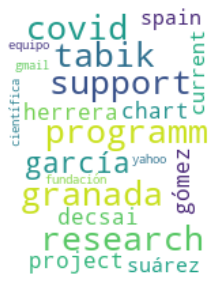

In [41]:
from wordcloud import WordCloud
text = dict(model_science.show_topic(0, topn=20))
l=list(text.keys())
wordcloud = WordCloud(width=150, height=200,max_font_size=25, max_words=20, background_color="white").generate(" ".join(l))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('graph8.png')

In [42]:
# LSA Model

a=pd.DataFrame()

for i in range(number_of_topics):
    words_covid_science =dict(model_science.show_topic(i, topn=words))
    b=pd.DataFrame(words_covid_science,index=[i])
    a=a.append(b)

a=a.transpose()

top_words = dict(model_science.show_topic(0,topn=5))

df = pd.DataFrame(columns=list(top_words.keys()), 
                  index = list(top_words.keys()))

l = list(top_words.keys())
print('cosine-similarity')
for i in l:
    for j in l:
            matrix=np.array([a.loc[i],a.loc[j]])
            n = s.metrics.pairwise.cosine_similarity(matrix, matrix, dense_output=True)
            df.loc[[i],[j]] = n[0,1]
print(df)

dfi.export(df, 'df_styled9.png')

cosine-similarity
            support   granada      covid   programm   research
support           1  0.956969 -0.0794645          1          1
granada    0.956969         1   0.213226   0.956969   0.956969
covid    -0.0794645  0.213226          1 -0.0794645 -0.0794645
programm          1  0.956969 -0.0794645          1          1
research          1  0.956969 -0.0794645          1          1


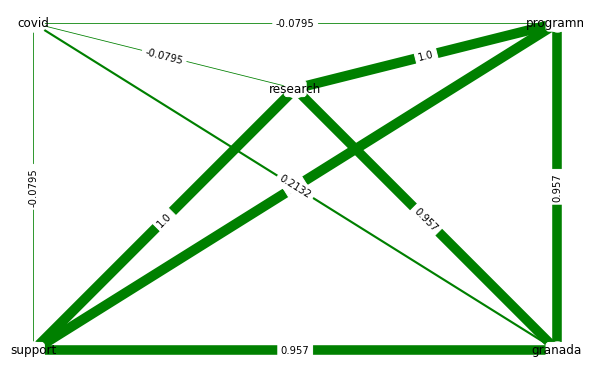

In [43]:
df = df.apply(pd.to_numeric, errors='coerce')

df=df.round(4)

l = list(top_words.keys())

df_adj = pd.DataFrame(df.to_numpy(), index=l, columns=l)
G = nx.from_pandas_adjacency(df)
pos = {l[0]: (0, 0),l[1]: (1, 0), l[2]: (0, 1), l[3]: (1, 1), l[4]: (0.5, 0.8)}
a=list(G.edges(data=True))

b=[]
for i in a:
    b.append(i[:][2]['weight'])
w = [x *10  for x in b]

colors = range(4)
nx.draw(G,pos, alpha=1, width=w, with_labels = True,node_size=200, edge_color='g',node_color='b')
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_nodes(G, pos, nodelist=l, node_color="w")
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.rcParams["figure.figsize"] = (8,5)
plt.savefig('fig9.png')

### covid-non-science.txt

In [44]:
document_list,titles,word_count_nscience=load_data("","covid-non-science.txt")

Number of words in text file : 8713
Total Number of Documents: 2


In [45]:
clean_text=preprocess_data(document_list)

['covid', 'recovery', 'covid', 'reality', 'reuters', 'published', 'updated', 'jones', 'london', 'reuters', 'world', 'shares', 'inched', 'towards', 'month', 'friday', 'industrial', 'bellwether', 'metal', 'copper', 'longest', 'weekly', 'winning', 'streak', 'nearly', 'three', 'years', 'recovering', 'global', 'nagging', 'coronavirus', 'nerves', 'market', 'rally', 'fuelled', 'record', 'numbers', 'largely', 'blown', 'itself', 'spike', 'covid', 'cases', 'though', 'fastest', 'expansion', 'china', 'services', 'sector', 'decade', 'stimulus', 'ensured', 'optimism', 'remained', 'chinese', 'shares', 'charged', 'their', 'highest', 'level', 'years', 'helping', 'asian', 'indexes', 'month', 'peaks', 'sight', 'european', 'markets', 'stalling', 'early', 'traders', 'surprise', 'currency', 'commodity', 'markets', 'subdued', 'after', 'otherwise', 'strong', 'confidence', 'sensitive', 'stalwarts', 'copper', 'sterling', 'australian', 'dollar', 'which', 'struggled', 'friday', 'think', 'infection', 'rates', 'fea

In [46]:
# LSA Model
number_of_topics=2
words=word_count_nscience
model_nscience=create_gensim_lsa_model(clean_text,number_of_topics,words)
words_from_non_science =dict(model_nscience.show_topic(0, topn=words))##dict and encoding matrix values

In [47]:
dict(model_nscience.show_topic(0, topn=5))

{'market': -0.29865735592426446,
 'covid': -0.21979867961934133,
 'friday': -0.18596179123202247,
 'infect': -0.15212490284470356,
 'month': -0.1465324530795608}

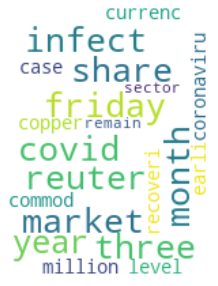

In [48]:
from wordcloud import WordCloud
text = dict(model_nscience.show_topic(0, topn=20))
l=list(text.keys())
wordcloud = WordCloud(width=150, height=200,max_font_size=25, max_words=20, background_color="white").generate(" ".join(l))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('graph9.png')

In [49]:
# LSA Model
a=pd.DataFrame()

for i in range(number_of_topics):
    words_covid_non_science =dict(model_nscience.show_topic(i, topn=words))
    b=pd.DataFrame(words_covid_non_science,index=[i])
    a=a.append(b)

a=a.transpose()

top_words = dict(model_nscience.show_topic(0,topn=5))

df = pd.DataFrame(columns=list(top_words.keys()), 
                  index = list(top_words.keys()))

l = list(top_words.keys())
print('cosine-similarity')
for i in l:
    for j in l:
            matrix=np.array([a.loc[i],a.loc[j]])
            n = s.metrics.pairwise.cosine_similarity(matrix, matrix, dense_output=True)
            df.loc[[i],[j]] = n[0,1]
print(df)

dfi.export(df, 'df_styled10.png')

cosine-similarity
          market     covid    friday    infect     month
market         1  0.741138  0.986861  0.813347  0.741138
covid   0.741138         1  0.839872  0.212223         1
friday  0.986861  0.839872         1  0.708661  0.839872
infect  0.813347  0.212223  0.708661         1  0.212223
month   0.741138         1  0.839872  0.212223         1


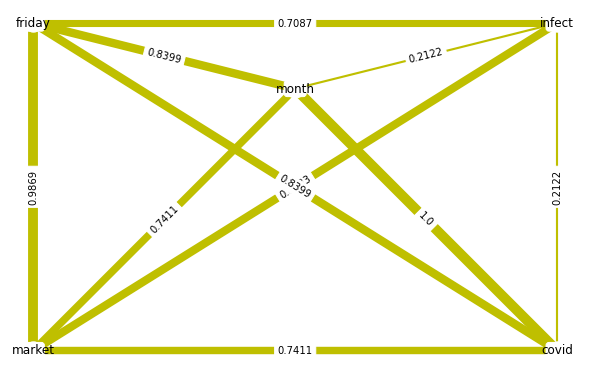

In [50]:
df = df.apply(pd.to_numeric, errors='coerce')

df=df.round(4)

l = list(top_words.keys())

df_adj = pd.DataFrame(df.to_numpy(), index=l, columns=l)
G = nx.from_pandas_adjacency(df)
pos = {l[0]: (0, 0),l[1]: (1, 0), l[2]: (0, 1), l[3]: (1, 1), l[4]: (0.5, 0.8)}
a=list(G.edges(data=True))

b=[]
for i in a:
    b.append(i[:][2]['weight'])
w = [x *10  for x in b]

colors = range(4)
nx.draw(G,pos, alpha=1, width=w, with_labels = True,node_size=200, edge_color='y',node_color='b')
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_nodes(G, pos, nodelist=l, node_color="w")
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.rcParams["figure.figsize"] = (8,5)
plt.savefig('fig10.png')

### covid-psychology.txt

In [51]:
document_list,titles,word_count_psy=load_data("","covid-psychology.txt")

Number of words in text file : 86550
Total Number of Documents: 2


In [52]:
clean_text=preprocess_data(document_list)

['international', 'sociology', 'author', 'article', 'reuse', 'guidelines', 'sagepub', 'journals', 'permissions', '0268580920948807', 'journals', 'sagepub', 'psychology', 'politics', 'covid', 'misinfodemics', 'people', 'believe', 'misinfodemics', 'sonia', 'mukhtar', 'university', 'management', 'technology', 'lahore', 'pakistan', 'abstract', 'misinfodemics', 'related', 'covid', 'negatively', 'impacted', 'people', 'lives', 'adverse', 'health', 'psycho', 'sociopolitical', 'outcomes', 'scientific', 'community', 'seeks', 'communicate', 'evidence', 'based', 'information', 'regarding', 'misplaced', 'preventive', 'strategies', 'misinformed', 'helpseeking', 'behaviors', 'global', 'multifaceted', 'systems', 'secondary', 'emerged', 'effects', 'misinfodemics', 'public', 'published', 'articles', 'pubmed', 'embase', 'google', 'scholar', 'elsevier', 'about', 'covid', 'related', 'misinfodemics', 'considered', 'reviewed', 'article', 'review', 'examines', 'mechanisms', 'operational', 'structure', 'preval

In [53]:
# LSA Model
number_of_topics=2
words=word_count_psy
model_psy=create_gensim_lsa_model(clean_text,number_of_topics,words)
words_from_psychology =dict(model_psy.show_topic(0, topn=words))##dict and encoding matrix values

In [54]:
#These variables are for further experimentation in vertical comparission mantel test
model_psy_p = create_gensim_lsa_model(clean_text,number_of_topics,words)

In [55]:
dict(model_psy.show_topic(0, topn=5))

{'misinfodem': 0.5033743541941375,
 'covid': 0.3629711503323513,
 'articl': 0.21459251935197482,
 'commun': 0.14837863098037746,
 'mechan': 0.14837863098037676}

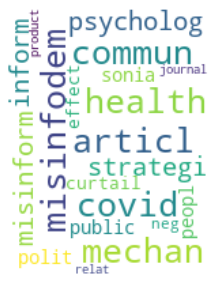

In [56]:
from wordcloud import WordCloud
text = dict(model_psy.show_topic(0, topn=20))
l=list(text.keys())
wordcloud = WordCloud(width=150, height=200,max_font_size=25, max_words=20, background_color="white").generate(" ".join(l))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('graph28.png')

In [57]:
# LSA Model

a=pd.DataFrame()

for i in range(number_of_topics):
    words_psychology =dict(model_psy.show_topic(i, topn=words))
    b=pd.DataFrame(words_psychology,index=[i])
    a=a.append(b)

a=a.transpose()

top_words = dict(model_psy.show_topic(0,topn=5))

df = pd.DataFrame(columns=list(top_words.keys()), 
                  index = list(top_words.keys()))

l = list(top_words.keys())
print('cosine-similarity')
for i in l:
    for j in l:
            matrix=np.array([a.loc[i],a.loc[j]])
            n = s.metrics.pairwise.cosine_similarity(matrix, matrix, dense_output=True)
            df.loc[[i],[j]] = n[0,1]
print(df)

dfi.export(df, 'df_styled11.png')

cosine-similarity
           misinfodem     covid    articl    commun    mechan
misinfodem          1  0.976353  0.993795  0.755596  0.755596
covid        0.976353         1  0.946251  0.879335  0.879335
articl       0.993795  0.946251         1  0.678051  0.678051
commun       0.755596  0.879335  0.678051         1         1
mechan       0.755596  0.879335  0.678051         1         1


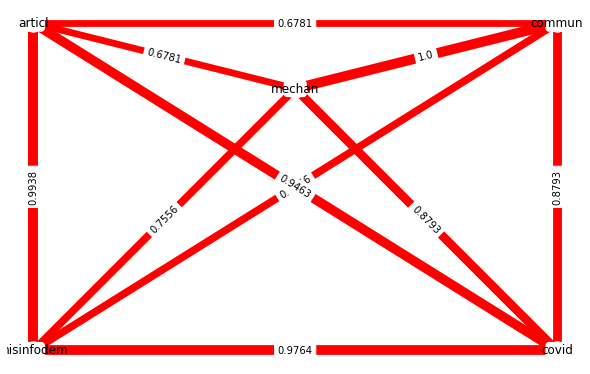

In [58]:
df = df.apply(pd.to_numeric, errors='coerce')

df=df.round(4)

l = list(top_words.keys())

df_adj = pd.DataFrame(df.to_numpy(), index=l, columns=l)
G = nx.from_pandas_adjacency(df)
pos = {l[0]: (0, 0),l[1]: (1, 0), l[2]: (0, 1), l[3]: (1, 1), l[4]: (0.5, 0.8)}
a=list(G.edges(data=True))

b=[]
for i in a:
    b.append(i[:][2]['weight'])
w = [x *10  for x in b]

colors = range(4)
nx.draw(G,pos, alpha=1, width=w, with_labels = True,node_size=200, edge_color='r',node_color='b')
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_nodes(G, pos, nodelist=l, node_color="w")
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.rcParams["figure.figsize"] = (8,5)
plt.savefig('fig11.png')

In [59]:
mantel_test(5)

Pairwise-distance
           misinfodem     covid    articl commun mechan   support    granada  \
misinfodem          0         0         0      0      0         0          0   
covid               0         0  0.378443      0      0  0.628979    0.47364   
articl              0  0.378443         0      0      0  0.423546   0.266413   
commun              0         0         0      0      0         0          0   
mechan              0         0         0      0      0         0          0   
support             0  0.628979  0.423546      0      0         0   0.168269   
granada             0   0.47364  0.266413      0      0  0.168269          0   
programm            0  0.545218  0.293443      0      0  0.133207  0.0775087   
research            0  0.545218  0.293443      0      0  0.133207  0.0775087   

             programm   research  
misinfodem          0          0  
covid        0.545218   0.545218  
articl       0.293443   0.293443  
commun              0          0  
mechan

(-0.12443276806076518, 0.65413, -0.5168730477188538)

In [60]:
mantel_test(10)

Pairwise-distance
           misinfodem     covid    articl commun mechan health psycholog  \
misinfodem          0         0         0      0      0      0         0   
covid               0         0  0.378443      0      0      0         0   
articl              0  0.378443         0      0      0      0         0   
commun              0         0         0      0      0      0         0   
mechan              0         0         0      0      0      0         0   
health              0         0         0      0      0      0         0   
psycholog           0         0         0      0      0      0         0   
strategi            0         0         0      0      0      0         0   
misinform           0         0         0      0      0      0         0   
inform              0         0         0      0      0      0         0   
support             0  0.628979  0.423546      0      0      0         0   
granada             0   0.47364  0.266413      0      0      0        

(-0.16750679664761384, 0.88844, -1.1558042446362033)

In [61]:
mantel_test_n(5)

Pairwise-distance
         market     covid friday infect month   support    granada   programm  \
market        0         0      0      0     0         0          0          0   
covid         0         0      0      0     0  0.628979    0.47364   0.545218   
friday        0         0      0      0     0         0          0          0   
infect        0         0      0      0     0         0          0          0   
month         0         0      0      0     0         0          0          0   
support       0  0.628979      0      0     0         0   0.168269   0.133207   
granada       0   0.47364      0      0     0  0.168269          0  0.0775087   
programm      0  0.545218      0      0     0  0.133207  0.0775087          0   
research      0  0.545218      0      0     0  0.133207  0.0775087          0   

           research  
market            0  
covid      0.545218  
friday            0  
infect            0  
month             0  
support    0.133207  
granada   0.07750

(-0.25569736166843005, 1.0, -1.131609129366209)

In [62]:
mantel_test_n(10)

Pairwise-distance
         market     covid friday infect month three reuter share year copper  \
market        0         0      0      0     0     0      0     0    0      0   
covid         0         0      0      0     0     0      0     0    0      0   
friday        0         0      0      0     0     0      0     0    0      0   
infect        0         0      0      0     0     0      0     0    0      0   
month         0         0      0      0     0     0      0     0    0      0   
three         0         0      0      0     0     0      0     0    0      0   
reuter        0         0      0      0     0     0      0     0    0      0   
share         0         0      0      0     0     0      0     0    0      0   
year          0         0      0      0     0     0      0     0    0      0   
copper        0         0      0      0     0     0      0     0    0      0   
support       0  0.628979      0      0     0     0      0     0    0      0   
granada       0   0.47

(-0.18476661538507216, 1.0, -1.386424786374516)

## Paragraph level

### covid-science.txt

In [63]:
def load_data(path,file_name):
    """
    Input  : path and file_name
    Purpose: loading text file
    Output : list of paragraphs/documents and
             title(initial 100 words considred as title of document)
    """
    documents_list = []
    titles=[]
    with open( os.path.join(path, file_name) ,"r",encoding='UTF8') as fin:
        data = fin.read()
        words = data.split()
        fin.seek(0)
        print('Number of words in text file :', len(words))
        for line in fin.readlines():
            text = line.strip()
            if text !='':
                documents_list.append(text)
    print("Total Number of Documents:",len(documents_list))
    titles.append( text[0:min(len(text),100)] )
    return documents_list,titles,len(words)

In [64]:
document_list,titles,word_count_science=load_data("","covid-science.txt")

Number of words in text file : 120257
Total Number of Documents: 14379


In [65]:
clean_text=preprocess_data(document_list)

['covidgr', 'dataset', 'covid', 'sdnet']
['methodology', 'predicting', 'covid']
['based', 'chest', 'images']
['tabik', 'gómez', 'martín', 'rodríguez', 'sevillano', 'garcía', 'charte']
['guirado', 'suárez', 'luengo', 'valero', 'gonzález', 'garcía', 'villanova']
['olmedo', 'sánchez', 'herrera']
['abstract', 'currently', 'coronavirus', 'disease', 'covid']
['infectious', 'diseases', 'century', 'diagnosed', 'using', 'testing', 'scans']
['chest', 'images', 'computed', 'tomography']
['scanners', 'testing', 'available']
['medical', 'centers', 'hence', 'cases', 'images']
['become', 'effective', 'assisting', 'clinicians', 'making', 'decisions', 'learning', 'neural', 'networks']
['great', 'potential', 'building', 'covid', 'triage', 'systems']
['detecting', 'covid', 'patients', 'especially', 'patients']
['severity', 'unfortunately', 'current', 'databases', 'allow']
['building', 'systems', 'highly', 'heterogeneous']
['biased', 'towards', 'severe', 'cases', 'article', 'threefold', 'demystify', 'sens

In [66]:
# LSA Model
number_of_topics=20
words=word_count_science
model_science=create_gensim_lsa_model(clean_text,number_of_topics,words)
words_from_law =dict(model_science.show_topic(0, topn=words))##dict and encoding matrix values

In [67]:
#These variables are for further experimentation in vertical comparission mantel test
model_science_paragraph=create_gensim_lsa_model(clean_text,number_of_topics,words)

In [68]:
dict(model_science.show_topic(0, topn=5))

{'covid': 0.835348015250747,
 'imag': 0.3551974666283513,
 'detect': 0.1421581702026208,
 'model': 0.126714953242308,
 'dataset': 0.10935480954447266}

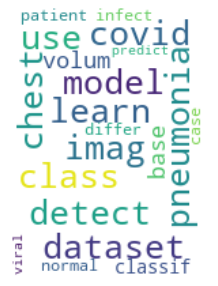

In [69]:
from wordcloud import WordCloud
text = dict(model_science.show_topic(0, topn=20))
l=list(text.keys())
wordcloud = WordCloud(width=150, height=200,max_font_size=25, max_words=20, background_color="white").generate(" ".join(l))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('graph10.png')

In [70]:
# LSA Model
a=pd.DataFrame()

for i in range(number_of_topics):
    words_science =dict(model_science.show_topic(i, topn=words))
    b=pd.DataFrame(words_science,index=[i])
    a=a.append(b)

a=a.transpose()

top_words = dict(model_science.show_topic(0,topn=5))

df = pd.DataFrame(columns=list(top_words.keys()), 
                  index = list(top_words.keys()))

l = list(top_words.keys())
print('cosine-similarity')
for i in l:
    for j in l:
            matrix=np.array([a.loc[i],a.loc[j]])
            n = s.metrics.pairwise.cosine_similarity(matrix, matrix, dense_output=True)
            df.loc[[i],[j]] = n[0,1]
print(df)

dfi.export(df, 'df_styled12.png')

cosine-similarity
              covid         imag      detect        model      dataset
covid             1  -0.00282975  0.00589357  -0.00120735  -0.00234126
imag    -0.00282975            1 -0.00970229 -0.000818478  -0.00606992
detect   0.00589357  -0.00970229           1   0.00510676  -0.00596494
model   -0.00120735 -0.000818478  0.00510676            1  0.000181606
dataset -0.00234126  -0.00606992 -0.00596494  0.000181606            1


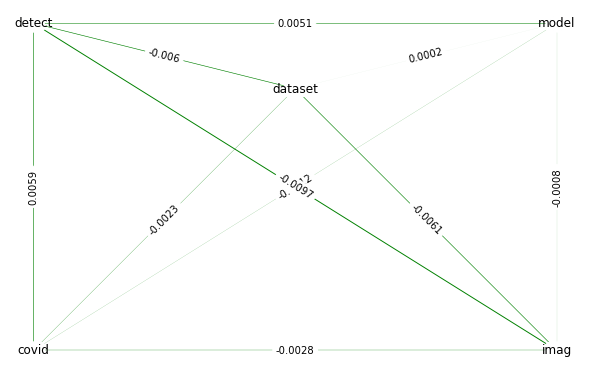

In [71]:
df = df.apply(pd.to_numeric, errors='coerce')

df=df.round(4)

l = list(top_words.keys())

df_adj = pd.DataFrame(df.to_numpy(), index=l, columns=l)
G = nx.from_pandas_adjacency(df)
pos = {l[0]: (0, 0),l[1]: (1, 0), l[2]: (0, 1), l[3]: (1, 1), l[4]: (0.5, 0.8)}
a=list(G.edges(data=True))

b=[]
for i in a:
    b.append(i[:][2]['weight'])
w = [x *100  for x in b]

colors = range(4)
nx.draw(G,pos, alpha=1, width=w, with_labels = True,node_size=200, edge_color='g',node_color='b')
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_nodes(G, pos, nodelist=l, node_color="w")
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.rcParams["figure.figsize"] = (8,5)
plt.savefig('fig12.png')

### covid-non-science-small.txt

In [72]:
document_list,titles,word_count_nscience=load_data("","covid-non-science.txt")

Number of words in text file : 8713
Total Number of Documents: 387


In [73]:
clean_text=preprocess_data(document_list)

['covid', 'recovery', 'covid', 'reality']
['reuters']
['published', 'updated']
['jones']
['london', 'reuters', 'world', 'shares', 'inched', 'towards', 'month', 'friday', 'industrial', 'bellwether', 'metal', 'copper', 'longest', 'weekly', 'winning', 'streak', 'nearly', 'three', 'years', 'recovering', 'global', 'nagging', 'coronavirus', 'nerves']
['market', 'rally', 'fuelled', 'record', 'numbers', 'largely', 'blown', 'itself', 'spike', 'covid', 'cases', 'though', 'fastest', 'expansion', 'china', 'services', 'sector', 'decade', 'stimulus', 'ensured', 'optimism', 'remained']
['chinese', 'shares', 'charged', 'their', 'highest', 'level', 'years', 'helping', 'asian', 'indexes', 'month', 'peaks', 'sight', 'european', 'markets', 'stalling', 'early', 'traders', 'surprise']
['currency', 'commodity', 'markets', 'subdued', 'after', 'otherwise', 'strong', 'confidence', 'sensitive', 'stalwarts', 'copper', 'sterling', 'australian', 'dollar', 'which', 'struggled', 'friday']
['think', 'infection', 'rate

In [74]:
# LSA Model
number_of_topics=20
words=word_count_nscience
model_nscience=create_gensim_lsa_model(clean_text,number_of_topics,words)
words_from_non_science =dict(model_nscience.show_topic(0, topn=words))##dict and encoding matrix values

In [75]:
dict(model_nscience.show_topic(0, topn=5))

{'trial': -0.4614933940742868,
 'vaccin': -0.3811205893046194,
 'stage': -0.32791335485243206,
 'expect': -0.23283549464984898,
 'dose': -0.19987756716304975}

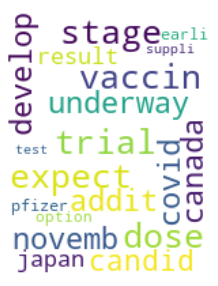

In [76]:
from wordcloud import WordCloud
text = dict(model_nscience.show_topic(0, topn=20))
l=list(text.keys())
wordcloud = WordCloud(width=150, height=200,max_font_size=25, max_words=20, background_color="white").generate(" ".join(l))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('graph11.png')

In [77]:
# LSA Model

a=pd.DataFrame()

for i in range(number_of_topics):
    words_non_science =dict(model_nscience.show_topic(i, topn=words))
    b=pd.DataFrame(words_non_science,index=[i])
    a=a.append(b)

a=a.transpose()

top_words = dict(model_nscience.show_topic(0,topn=5))

df = pd.DataFrame(columns=list(top_words.keys()), 
                  index = list(top_words.keys()))

l = list(top_words.keys())
print('cosine-similarity')
for i in l:
    for j in l:
            matrix=np.array([a.loc[i],a.loc[j]])
            n = s.metrics.pairwise.cosine_similarity(matrix, matrix, dense_output=True)
            df.loc[[i],[j]] = n[0,1]
print(df)

dfi.export(df, 'df_styled13.png')

cosine-similarity
           trial    vaccin     stage    expect      dose
trial          1  0.236693  0.967238  0.899454  0.756959
vaccin  0.236693         1  0.254672  0.299765  0.630181
stage   0.967238  0.254672         1  0.952112  0.790247
expect  0.899454  0.299765  0.952112         1  0.796809
dose    0.756959  0.630181  0.790247  0.796809         1


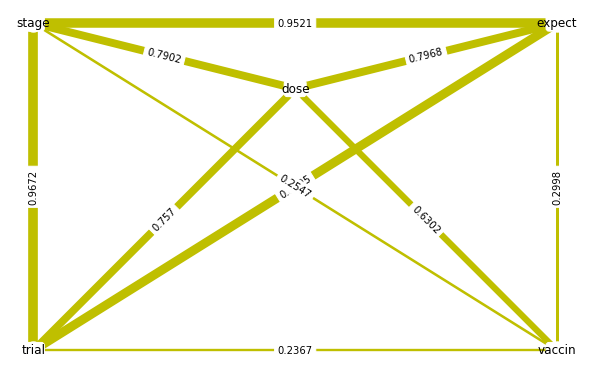

In [78]:
df = df.apply(pd.to_numeric, errors='coerce')

df=df.round(4)

l = list(top_words.keys())

df_adj = pd.DataFrame(df.to_numpy(), index=l, columns=l)
G = nx.from_pandas_adjacency(df)
pos = {l[0]: (0, 0),l[1]: (1, 0), l[2]: (0, 1), l[3]: (1, 1), l[4]: (0.5, 0.8)}
a=list(G.edges(data=True))

b=[]
for i in a:
    b.append(i[:][2]['weight'])
w = [x *10  for x in b]

colors = range(4)
nx.draw(G,pos, alpha=1, width=w, with_labels = True,node_size=200, edge_color='y',node_color='b')
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_nodes(G, pos, nodelist=l, node_color="w")
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.rcParams["figure.figsize"] = (8,5)
plt.savefig('fig13.png')

### covid-psychology-small.txt

In [79]:
document_list,titles,word_count_psy=load_data("","covid-psychology.txt")

Number of words in text file : 86550
Total Number of Documents: 9007


In [80]:
clean_text=preprocess_data(document_list)

['international', 'sociology']
[]
['author']
['article', 'reuse', 'guidelines']
['sagepub', 'journals', 'permissions']
['0268580920948807']
['journals', 'sagepub']
['psychology', 'politics']
['covid', 'misinfodemics']
['people']
['believe', 'misinfodemics']
['sonia', 'mukhtar']
['university', 'management', 'technology', 'lahore', 'pakistan']
['abstract']
['misinfodemics', 'related', 'covid', 'negatively', 'impacted', 'people', 'lives', 'adverse']
['health', 'psycho', 'sociopolitical', 'outcomes', 'scientific', 'community', 'seeks', 'communicate']
['evidence', 'based', 'information', 'regarding', 'misplaced', 'preventive', 'strategies', 'misinformed', 'helpseeking', 'behaviors', 'global', 'multifaceted', 'systems', 'secondary', 'emerged', 'effects']
['misinfodemics', 'public', 'published', 'articles', 'pubmed', 'embase', 'google', 'scholar', 'elsevier']
['about', 'covid', 'related', 'misinfodemics', 'considered', 'reviewed', 'article']
['review', 'examines', 'mechanisms', 'operational',

In [81]:
# LSA Model
number_of_topics=20
words=word_count_psy
model_psy=create_gensim_lsa_model(clean_text,number_of_topics,words)
words_from_psychology =dict(model_psy.show_topic(0, topn=words))##dict and encoding matrix values

In [82]:
#These variables are for further experimentation in vertical comparission mantel test
model_psy_paragraph=create_gensim_lsa_model(clean_text,number_of_topics,words)

In [83]:
dict(model_psy.show_topic(0, topn=5))

{'covid': 0.4453016891852977,
 'pandem': 0.3598206556230589,
 'health': 0.3346202937615597,
 'polici': 0.26271950834574903,
 'impact': 0.21515356479094486}

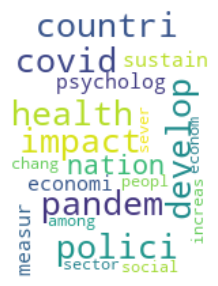

In [84]:
from wordcloud import WordCloud
text = dict(model_psy.show_topic(0, topn=20))
l=list(text.keys())
wordcloud = WordCloud(width=150, height=200,max_font_size=25, max_words=20, background_color="white").generate(" ".join(l))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('graph29.png')

In [85]:
# LSA Model
a=pd.DataFrame()

for i in range(number_of_topics):
    words_psychology =dict(model_psy.show_topic(i, topn=words))
    b=pd.DataFrame(words_psychology,index=[i])
    a=a.append(b)

a=a.transpose()

top_words = dict(model_psy.show_topic(0,topn=5))

df = pd.DataFrame(columns=list(top_words.keys()), 
                  index = list(top_words.keys()))

l = list(top_words.keys())
print('cosine-similarity')
for i in l:
    for j in l:
            matrix=np.array([a.loc[i],a.loc[j]])
            n = s.metrics.pairwise.cosine_similarity(matrix, matrix, dense_output=True)
            df.loc[[i],[j]] = n[0,1]
print(df)

dfi.export(df, 'df_styled14.png')

cosine-similarity
              covid       pandem      health      polici      impact
covid             1  0.000945069   -0.010216  0.00629539    0.039352
pandem  0.000945069            1 -0.00824093   0.0267821 -0.00426252
health    -0.010216  -0.00824093           1   0.0445099  -0.0354746
polici   0.00629539    0.0267821   0.0445099           1   0.0298569
impact     0.039352  -0.00426252  -0.0354746   0.0298569           1


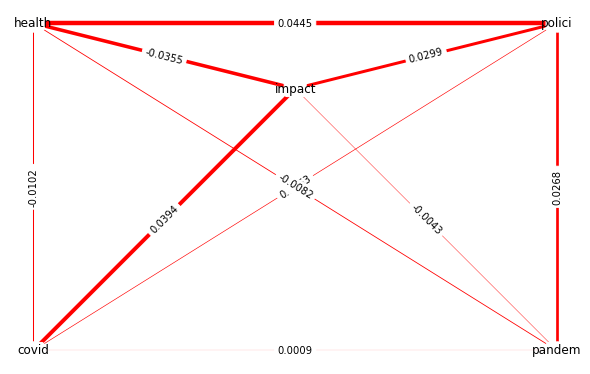

In [86]:
df = df.apply(pd.to_numeric, errors='coerce')

df=df.round(4)

l = list(top_words.keys())

df_adj = pd.DataFrame(df.to_numpy(), index=l, columns=l)
G = nx.from_pandas_adjacency(df)
pos = {l[0]: (0, 0),l[1]: (1, 0), l[2]: (0, 1), l[3]: (1, 1), l[4]: (0.5, 0.8)}
a=list(G.edges(data=True))

b=[]
for i in a:
    b.append(i[:][2]['weight'])
w = [x *100  for x in b]

colors = range(4)
nx.draw(G,pos, alpha=1, width=w, with_labels = True,node_size=200, edge_color='r',node_color='b')
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_nodes(G, pos, nodelist=l, node_color="w")
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.rcParams["figure.figsize"] = (8,5)
plt.savefig('fig14.png')

In [87]:
mantel_test(5)

Pairwise-distance
            covid     pandem    health     polici       impact      imag  \
covid           0   0.958406     1.002   0.988247     0.985564   1.39644   
pandem   0.958406          0  0.150457  0.0473991    0.0451842  0.988948   
health      1.002   0.150457         0   0.165412     0.166753   1.00689   
polici   0.988247  0.0473991  0.165412          0     0.016343  0.983969   
impact   0.985564  0.0451842  0.166753   0.016343  4.65661e-10   0.98335   
imag      1.39644   0.988948   1.00689   0.983969      0.98335         0   
detect    1.29896   0.869252  0.883351   0.848802     0.853976   1.30243   
model     1.39867   0.989329   1.00854   0.987349     0.987668   1.39232   
dataset   1.39968   0.996124   1.00287   0.986308     0.986155   1.39618   

           detect        model      dataset  
covid     1.29896      1.39867      1.39968  
pandem   0.869252     0.989329     0.996124  
health   0.883351      1.00854      1.00287  
polici   0.848802     0.987349     0.

(-0.47233691706581515, 0.93007, -1.4352624419113937)

In [88]:
mantel_test(10)

Pairwise-distance
              covid     pandem    health     polici       impact    countri  \
covid             0   0.958406     1.002   0.988247     0.985564   0.986266   
pandem     0.958406          0  0.150457  0.0473991    0.0451842  0.0742094   
health        1.002   0.150457         0   0.165412     0.166753   0.182912   
polici     0.988247  0.0473991  0.165412          0     0.016343  0.0645547   
impact     0.985564  0.0451842  0.166753   0.016343  4.65661e-10  0.0691747   
countri    0.986266  0.0742094  0.182912  0.0645547    0.0691747          0   
develop    0.981158  0.0478543  0.161234   0.033688    0.0369141  0.0688784   
nation     0.992413  0.0448254  0.154826  0.0228802    0.0232452  0.0631118   
psycholog  0.990363  0.0603611  0.185693  0.0216142    0.0247095  0.0676272   
sustain    0.990347  0.0612376  0.186512  0.0226199    0.0256283  0.0682887   
imag        1.39644   0.988948   1.00689   0.983969      0.98335   0.988474   
detect      1.29896   0.869252  0.

(-0.2627615739738422, 0.8836, -1.2038818741062816)

In [89]:
mantel_test_n(5)

Pairwise-distance
             trial     vaccin      stage     expect dose     covid      imag  \
trial            0  0.0154886  0.0255324  0.0187806    0  0.989816  0.981963   
vaccin   0.0154886          0  0.0303668   0.029283    0  0.980472   0.98415   
stage    0.0255324  0.0303668          0  0.0290166    0  0.989095  0.978101   
expect   0.0187806   0.029283  0.0290166          0    0  0.989618  0.983301   
dose             0          0          0          0    0         0         0   
covid     0.989816   0.980472   0.989095   0.989618    0         0   1.39644   
imag      0.981963    0.98415   0.978101   0.983301    0   1.39644         0   
detect    0.846972   0.850873   0.849099   0.847821    0   1.29896   1.30243   
model     0.986677   0.987979   0.985134   0.982803    0   1.39867   1.39232   
dataset   0.985212   0.985167   0.990273   0.980556    0   1.39968   1.39618   

           detect        model      dataset  
trial    0.846972     0.986677     0.985212  
vaccin   

(-0.1169138190537623, 0.65842, -0.4078013989965543)

In [90]:
mantel_test_n(10)

Pairwise-distance
                trial     vaccin      stage     expect dose underway  \
trial               0  0.0154886  0.0255324  0.0187806    0        0   
vaccin      0.0154886          0  0.0303668   0.029283    0        0   
stage       0.0255324  0.0303668          0  0.0290166    0        0   
expect      0.0187806   0.029283  0.0290166          0    0        0   
dose                0          0          0          0    0        0   
underway            0          0          0          0    0        0   
novemb     0.00841559  0.0182124  0.0261269  0.0202633    0        0   
addit       0.0364459  0.0400624   0.041101  0.0370752    0        0   
develop     0.0462419  0.0418069  0.0524836  0.0485678    0        0   
covid        0.989816   0.980472   0.989095   0.989618    0        0   
imag         0.981963    0.98415   0.978101   0.983301    0        0   
detect       0.846972   0.850873   0.849099   0.847821    0        0   
model        0.986677   0.987979   0.985134   

(-0.045269414483095086, 0.60068, -0.2343293791362985)

In [91]:
def mantel_test_verticle(model_a,model_b,n):
    words_science = dict(model_a.show_topic(0, topn=word_count_science))
    words_psy = dict(model_b.show_topic(0, topn=word_count_psy))

    top_words_science = dict(model_a.show_topic(0, topn=n)) 
    top_words_psy = dict(model_b.show_topic(0,topn=n)) 


    c={} #law words in non law
    for key in top_words_science:
        try:
            c[key] = words_psy[key]
        except KeyError:
            c[key] = 0

    top_words_psy.update(c)

    b={} #non law words in law
    for key in top_words_psy:
        try:
            b[key] = words_science[key]
        except KeyError:
            b[key] = 0

    b.update(top_words_science)
    top_words_science=b

    #pairwise distance for law
    a=pd.DataFrame()

    for i in range(number_of_topics):
        words_from_science =dict(model_a.show_topic(i, topn=word_count_science))
        b=pd.DataFrame(words_from_science,index=[i])
        a=a.append(b)

    a=a.transpose()

    df = pd.DataFrame(columns=list(top_words_science.keys()), 
                      index = list(top_words_science.keys()))

    l = list(top_words_science.keys())

    print('Pairwise-distance')
    for i in l:
        for j in l:
            try:
                matrix=np.array([a.loc[i],a.loc[j]])
            except KeyError:
                matrix=np.zeros((2,3))
            n = s.metrics.pairwise.nan_euclidean_distances(matrix, matrix)
            df.loc[[i],[j]] = n[0,1]
    print(df)
    df1 = df.to_numpy()
    #pairwise distace for non-law
    a=pd.DataFrame()

    for i in range(number_of_topics):
        words_from_psy =dict(model_b.show_topic(i, topn=word_count_psy))
        b=pd.DataFrame(words_from_psy,index=[i])
        a=a.append(b)

    a=a.transpose()

    df = pd.DataFrame(columns=list(top_words_psy.keys()), 
                      index = list(top_words_psy.keys()))

    l = list(top_words_psy.keys())
    print('Pairwise-distance')
    for i in l:
        for j in l:
            try:
                matrix=np.array([a.loc[i],a.loc[j]])
            except KeyError:
                matrix=np.zeros((2,3))
            n = s.metrics.pairwise.nan_euclidean_distances(matrix, matrix)
            df.loc[[i],[j]] = n[0,1]
    print(df)
    df2 = df.to_numpy()
    

    dist1 = list(df1[np.triu_indices(len(top_words_science), k = 1)])

    

    dist2 = list(df2[np.triu_indices(len(top_words_psy), k = 1)])

    return mantel.test(dist1, dist2, perms=10000, method='pearson', tail='upper')

In [92]:
mantel_test_verticle(model_science_articles,model_science_p,5)

Pairwise-distance
              support    granada     covid  research   programm      imag  \
support   1.86265e-09   0.103484   0.66527  0.156447   0.101063  0.834777   
granada      0.103484          0  0.701122  0.129845  0.0340417  0.816705   
covid         0.66527   0.701122         0  0.664301   0.704825   1.01386   
research     0.156447   0.129845  0.664301         0   0.119473  0.813048   
programm     0.101063  0.0340417  0.704825  0.119473          0  0.813252   
imag         0.834777   0.816705   1.01386  0.813048   0.813252         0   
model        0.730458   0.710287  0.966408  0.721914   0.709588   1.13159   
dataset      0.627463   0.626551  0.983197  0.625169   0.630951  0.935924   
class         0.49842   0.477425  0.747855  0.528585   0.496518   0.94137   

                model   dataset        class  
support      0.730458  0.627463      0.49842  
granada      0.710287  0.626551     0.477425  
covid        0.966408  0.983197     0.747855  
research     0.721914  

(0.28155964005516, 0.1844, 1.0448006280884938)

In [93]:
mantel_test_verticle(model_science_articles,model_science_paragraph,5)

Pairwise-distance
            covid      imag    detect        model   dataset        class
covid           0   1.01386  0.744875     0.966408  0.983197     0.747855
imag      1.01386         0  0.836253      1.13159  0.935924      0.94137
detect   0.744875  0.836253         0     0.721344   0.75098     0.605089
model    0.966408   1.13159  0.721344  1.49012e-08  0.950057     0.851355
dataset  0.983197  0.935924   0.75098     0.950057         0     0.788631
class    0.747855   0.94137  0.605089     0.851355  0.788631  1.05367e-08
Pairwise-distance
           covid     imag   detect    model  dataset        class
covid          0  1.39641  1.30231  1.39852  1.39979      1.37625
imag     1.39641        0  1.30502  1.39268  1.39636      1.37191
detect   1.30231  1.30502        0  1.29843  1.30473      1.28984
model    1.39852  1.39268  1.29843        0  1.39529       1.3792
dataset  1.39979  1.39636  1.30473  1.39529        0      1.37866
class    1.37625  1.37191  1.28984   1.3792  1.378

(0.7846258052940326, 0.029166666666666667, 1.8380929187635267)

In [94]:
mantel_test_verticle(model_science_p,model_science_paragraph,5)

Pairwise-distance
             covid      imag    detect     model   dataset   support  \
covid            0  0.718751   1.19674   1.19674   1.19674   1.98901   
imag      0.718751         0  0.490208  0.490208  0.490208   1.59634   
detect     1.19674  0.490208         0         0         0   1.33937   
model      1.19674  0.490208         0         0         0   1.33937   
dataset    1.19674  0.490208         0         0         0   1.33937   
support    1.98901   1.59634   1.33937   1.33937   1.33937         0   
granada    1.49778   1.06422  0.842472  0.842472  0.842472  0.532112   
research   1.72413   1.23459  0.927949  0.927949  0.927949  0.421236   
programm   1.72413   1.23459  0.927949  0.927949  0.927949  0.421236   

           granada   research   programm  
covid      1.49778    1.72413    1.72413  
imag       1.06422    1.23459    1.23459  
detect    0.842472   0.927949   0.927949  
model     0.842472   0.927949   0.927949  
dataset   0.842472   0.927949   0.927949  
sup

(0.26279745058340426, 0.1414, 1.173127795612967)

In [95]:
mantel_test_verticle(model_psy_articles,model_psy_p,5)

Pairwise-distance
           misinfodem        covid    articl    commun    health psycholog  \
misinfodem          0     0.646964  0.356566  0.221824  0.700337  0.630503   
covid        0.646964  1.49012e-08  0.580969  0.622214  0.898325  0.737681   
articl       0.356566     0.580969         0  0.325056  0.661872  0.515819   
commun       0.221824     0.622214  0.325056         0  0.662091  0.506073   
health       0.700337     0.898325  0.661872  0.662091         0  0.666982   
psycholog    0.630503     0.737681  0.515819  0.506073  0.666982         0   
social       0.513122     0.778668  0.565552    0.5067  0.798641   0.65021   
epidem       0.548041     0.779457   0.52647  0.523629  0.797412  0.633251   

                 social    epidem  
misinfodem     0.513122  0.548041  
covid          0.778668  0.779457  
articl         0.565552   0.52647  
commun           0.5067  0.523629  
health         0.798641  0.797412  
psycholog       0.65021  0.633251  
social      1.05367e-08  0.

(-0.1229249158139808, 0.6418, -0.3898907841370266)

In [96]:
mantel_test_verticle(model_psy_articles,model_psy_paragraph,5)

Pairwise-distance
                 covid       pandem    health    polici    impact psycholog  \
covid      1.49012e-08     0.586377  0.898325  0.600431   0.62641  0.737681   
pandem        0.586377  1.05367e-08  0.657499   0.38949  0.455361   0.55745   
health        0.898325     0.657499         0  0.689582  0.679214  0.666982   
polici        0.600431      0.38949  0.689582         0  0.288467  0.499608   
impact         0.62641     0.455361  0.679214  0.288467         0  0.556516   
psycholog     0.737681      0.55745  0.666982  0.499608  0.556516         0   
social        0.778668     0.639384  0.798641  0.547895  0.660645   0.65021   
epidem        0.779457     0.640981  0.797412  0.486348   0.58212  0.633251   

                social    epidem  
covid         0.778668  0.779457  
pandem        0.639384  0.640981  
health        0.798641  0.797412  
polici        0.547895  0.486348  
impact        0.660645   0.58212  
psycholog      0.65021  0.633251  
social     1.05367e-08  0

(0.6582634123012504, 0.0169, 1.9312972812416624)

In [97]:
mantel_test_verticle(model_psy_p,model_psy_paragraph,5)

Pairwise-distance
               covid    pandem    health polici    impact misinfodem  \
covid              0   1.21004  0.747682      0  0.999968   0.605022   
pandem       1.21004         0  0.549558      0  0.846734    1.81507   
health      0.747682  0.549558         0      0   0.46139     1.3363   
polici             0         0         0      0         0          0   
impact      0.999968  0.846734   0.46139      0         0    1.49652   
misinfodem  0.605022   1.81507    1.3363      0   1.49652          0   
articl      0.507819   1.09912  0.549558      0  0.559313   0.938588   
commun      0.747682  0.549558         0      0   0.46139     1.3363   

              articl    commun  
covid       0.507819  0.747682  
pandem       1.09912  0.549558  
health      0.549558         0  
polici             0         0  
impact      0.559313   0.46139  
misinfodem  0.938588    1.3363  
articl             0  0.549558  
commun      0.549558  8.33e-09  
Pairwise-distance
               cov

(0.024257150643832416, 0.481, 0.06582798273513495)

In [98]:
mantel_test_verticle(model_science_articles,model_science_p,10)

Pairwise-distance
              support    granada     covid    programm  research      tabik  \
support   1.86265e-09   0.103484   0.66527    0.101063  0.156447   0.112256   
granada      0.103484          0  0.701122   0.0340417  0.129845  0.0255313   
covid         0.66527   0.701122         0    0.704825  0.664301    0.69942   
programm     0.101063  0.0340417  0.704825           0  0.119473   0.059573   
research     0.156447   0.129845  0.664301    0.119473         0   0.142549   
tabik        0.112256  0.0255313   0.69942    0.059573  0.142549          0   
garcía       0.100744  0.0197854  0.702338   0.0165103  0.123104  0.0447392   
decsai         0.1006  0.0255313  0.703747  0.00851043  0.121256  0.0510626   
project      0.139803   0.112686  0.717977    0.093771   0.14191   0.130951   
chart       0.0942134  0.0307356  0.701703   0.0151091   0.12225  0.0547991   
imag         0.834777   0.816705   1.01386    0.813252  0.813048   0.820213   
model        0.730458   0.710287  

(0.18832783456653382, 0.1602, 1.0344855963798059)

In [99]:
mantel_test_verticle(model_science_articles,model_science_paragraph,10)

Pairwise-distance
              covid      imag    detect        model   dataset     learn  \
covid             0   1.01386  0.744875     0.966408  0.983197  0.853802   
imag        1.01386         0  0.836253      1.13159  0.935924   0.99937   
detect     0.744875  0.836253         0     0.721344   0.75098  0.659699   
model      0.966408   1.13159  0.721344  1.49012e-08  0.950057  0.890738   
dataset    0.983197  0.935924   0.75098     0.950057         0  0.882097   
learn      0.853802   0.99937  0.659699     0.890738  0.882097         0   
pneumonia  0.773571  0.758103  0.546756     0.754637  0.795041  0.668047   
use        0.638247  0.829421  0.418005     0.749587  0.656879  0.578637   
class      0.747855   0.94137  0.605089     0.851355  0.788631  0.726501   
chest      0.709922  0.764922  0.377088     0.749506  0.723607  0.632363   
perform    0.731261  0.875433  0.472107     0.595767  0.729462  0.629472   
train      0.687667  0.733119  0.446377     0.723461  0.754527  0.6034

(0.4851744054306096, 0.0043, 1.6749964469443324)

In [100]:
mantel_test_verticle(model_science_p,model_science_paragraph,10)

Pairwise-distance
              covid      imag    detect       model     dataset       learn  \
covid             0  0.718751   1.19674     1.19674     1.19674     1.19674   
imag       0.718751         0  0.490208    0.490208    0.490208    0.490208   
detect      1.19674  0.490208         0           0           0           0   
model       1.19674  0.490208         0           0           0  2.9451e-09   
dataset     1.19674  0.490208         0           0           0  2.9451e-09   
learn       1.19674  0.490208         0  2.9451e-09  2.9451e-09           0   
pneumonia         0         0         0           0           0           0   
use         1.19674  0.490208         0           0           0           0   
class             0         0         0           0           0           0   
chest      0.956202  0.245104  0.245104    0.245104    0.245104    0.245104   
support     1.98901   1.59634   1.33937     1.33937     1.33937     1.33937   
granada     1.49778   1.06422  0.8

(-0.008107041561424666, 0.5304, -0.051907664378004925)

In [101]:
mantel_test_verticle(model_psy_articles,model_psy_p,10)

Pairwise-distance
           misinfodem        covid    articl    commun    health     mechan  \
misinfodem          0     0.646964  0.356566  0.221824  0.700337   0.193529   
covid        0.646964  1.49012e-08  0.580969  0.622214  0.898325   0.608591   
articl       0.356566     0.580969         0  0.325056  0.661872   0.228043   
commun       0.221824     0.622214  0.325056         0  0.662091   0.172176   
health       0.700337     0.898325  0.661872  0.662091         0   0.666958   
mechan       0.193529     0.608591  0.228043  0.172176  0.666958          0   
psycholog    0.630503     0.737681  0.515819  0.506073  0.666982   0.532973   
strategi     0.174144     0.617777  0.254271  0.155585  0.647421  0.0847199   
misinform    0.103669     0.623656  0.279462  0.170592  0.675438  0.0914923   
public       0.362985     0.663889  0.416788   0.26013  0.671538   0.328671   
social       0.513122     0.778668  0.565552    0.5067  0.798641   0.490075   
epidem       0.548041     0.779457

(-0.2297680221676044, 0.873, -1.1783474351270118)

In [102]:
mantel_test_verticle(model_psy_articles,model_psy_paragraph,10)

Pairwise-distance
                 covid       pandem    health    polici    impact   countri  \
covid      1.49012e-08     0.586377  0.898325  0.600431   0.62641  0.518814   
pandem        0.586377  1.05367e-08  0.657499   0.38949  0.455361  0.557135   
health        0.898325     0.657499         0  0.689582  0.679214  0.843713   
polici        0.600431      0.38949  0.689582         0  0.288467  0.471694   
impact         0.62641     0.455361  0.679214  0.288467         0  0.563248   
countri       0.518814     0.557135  0.843713  0.471694  0.563248         0   
develop       0.629306     0.336736  0.671243  0.175511   0.25525  0.496134   
nation        0.647706     0.440737  0.625509  0.199817  0.290865  0.489712   
psycholog     0.737681      0.55745  0.666982  0.499608  0.556516  0.629914   
sustain       0.663098     0.368456  0.732703  0.217227  0.233976  0.513263   
social        0.778668     0.639384  0.798641  0.547895  0.660645  0.684603   
epidem        0.779457     0.64098

(0.6923716848577194, 0.0004, 2.992341191219701)

In [103]:
mantel_test_verticle(model_psy_p,model_psy_paragraph,10)

Pairwise-distance
               covid    pandem      health polici    impact countri   develop  \
covid              0   1.21004    0.747682      0  0.999968       0  0.999968   
pandem       1.21004         0    0.549558      0  0.846734       0  0.846734   
health      0.747682  0.549558           0      0   0.46139       0   0.46139   
polici             0         0           0      0         0       0         0   
impact      0.999968  0.846734     0.46139      0         0       0         0   
countri            0         0           0      0         0       0         0   
develop     0.999968  0.846734     0.46139      0         0       0         0   
nation             0         0           0      0         0       0         0   
psycholog   0.761729   1.12845    0.605737      0  0.403348       0  0.403348   
sustain            0         0           0      0         0       0         0   
misinfodem  0.605022   1.81507      1.3363      0   1.49652       0   1.49652   
articl    

(0.051967882478809554, 0.412, 0.25059387073785117)